<h1>Tarea semanal 4 BIS</h1>

<h3> Consignas </h3>

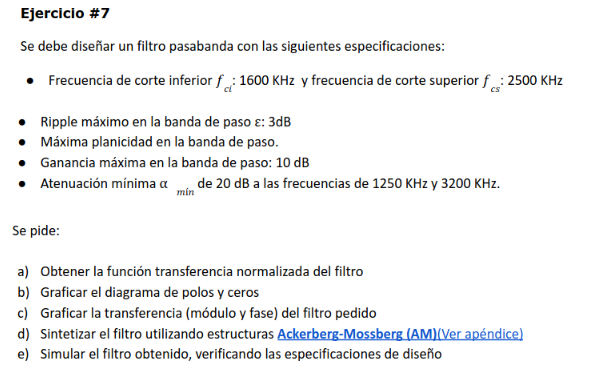

<h3> Resolucion de las consignas</h3>

Se adjunta el desarrollo hecho a mano:

<object data="Desarrollo.pdf" type="application/pdf" width="100%" height="800px">
  <p>El archivo PDF no se puede mostrar. <a href="Desarrollo.pdf">Haz clic aquí para descargarlo.</a></p>
</object>

<h1>Simulaciones</h1>

<h3><u>Python</u></h3>


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat May 27 22:05:00 2023

@author: guido
"""
import numpy as np
from scipy.signal import TransferFunction,freqs
from scipy import signal as sig
from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq,tfcascade


alpha_min=7.554513602884673 para un n=1
alpha_min=13.624411665932236 para un n=2
alpha_min=20.189303491162548 para un n=3
alpha_min=26.87230122444515 para un n=4


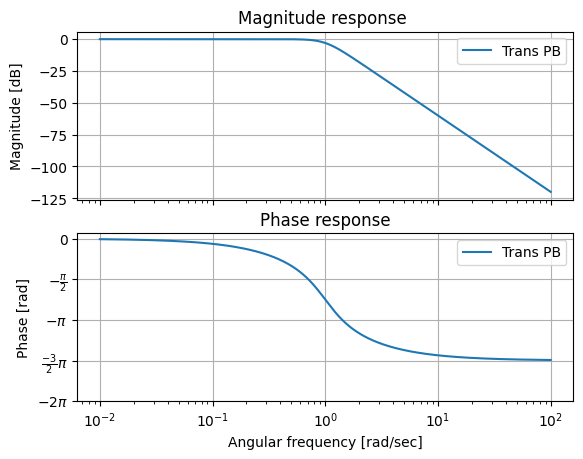

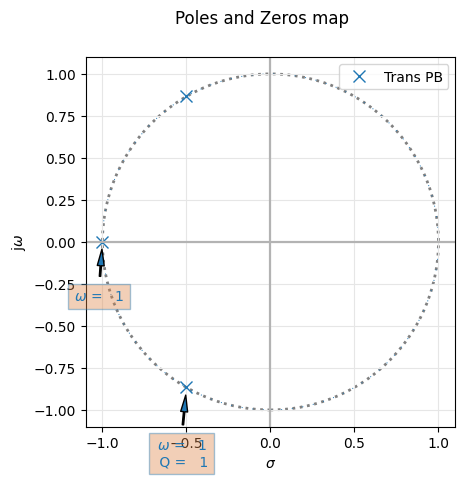

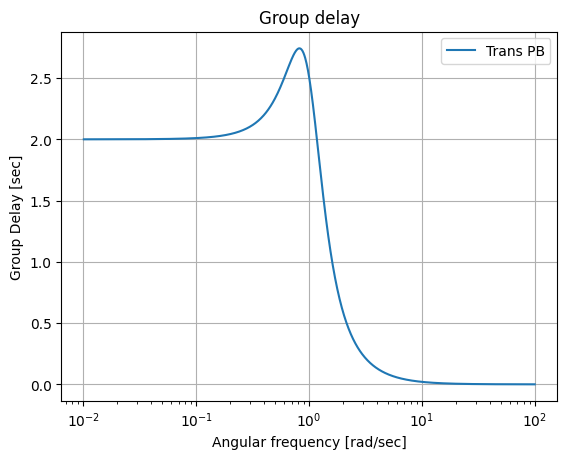

In [7]:

fp1 = 1600 * 10**3
fp2 = 2500 * 10**3
fs1 = 1250 * 10**3
fs2 = 3200 * 10**3

norma_w = np.sqrt(fp1*fp2)

wp1_n = fp1 / norma_w 
wp2_n = fp2 / norma_w
ws1_n = fs1 / norma_w
ws2_n = fs2 / norma_w

Q = 1/(wp2_n - wp1_n)
# valores de omega con nucleo de transformacion (para plantilla de pasa bajos)
omega_s1=  Q * (ws1_n**2 - 1)/ws1_n
omega_s2=  Q * (ws2_n**2 - 1)/ws2_n
omega_p1=  Q * (wp1_n**2 - 1)/wp1_n
omega_p2=  Q * (wp2_n**2 - 1)/wp2_n

omega_s = omega_s2 # elijo los valores mas exigentes para el filtro 
omega_p = omega_p2

for n in range(1,5): # veo que numero de N se necesita para la plantilla del PB
    alpha_min = 10 * np.log10(1+ omega_s**(2*n) )
    print(f"alpha_min={alpha_min} para un n={n}")
   
num = np.array([ 1 ])
den = np.array([ 1, 1 , 1])
H1_PB = sig.TransferFunction( num, den )
num = np.array([ 1 ])
den = np.array([1 , 1])
H2_PB = sig.TransferFunction( num, den )
HTOTAL_PB = tfcascade( H1_PB , H2_PB)

analyze_sys(HTOTAL_PB, sys_name='Trans PB')


A continuacion se utiliza el nucleo de transformacion para poder obtener el filtro pasa bandas incial.
Una vez remplazada la variable $ del filtro PB por el nucleo de transformacion se obtiene una transferencia que se adecua para obtener 3 filtros de segundo orden. 



ROOTS: [-0.13414404+1.20766417j -0.13414404-1.20766417j -0.09085596+0.81795274j
 -0.09085596-0.81795274j]


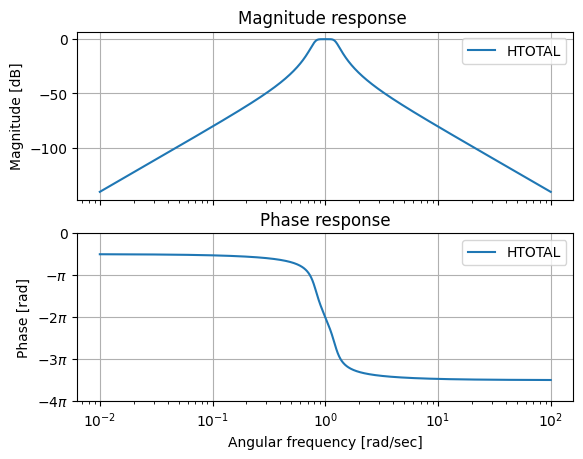

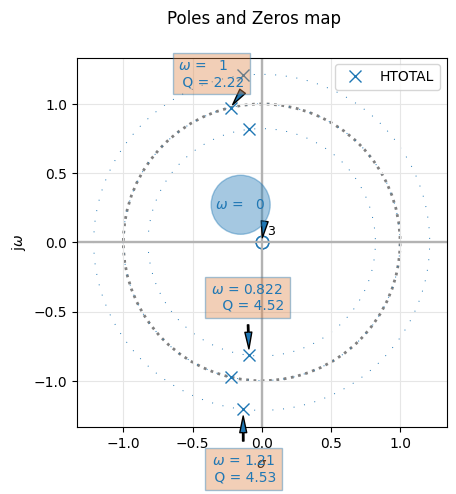

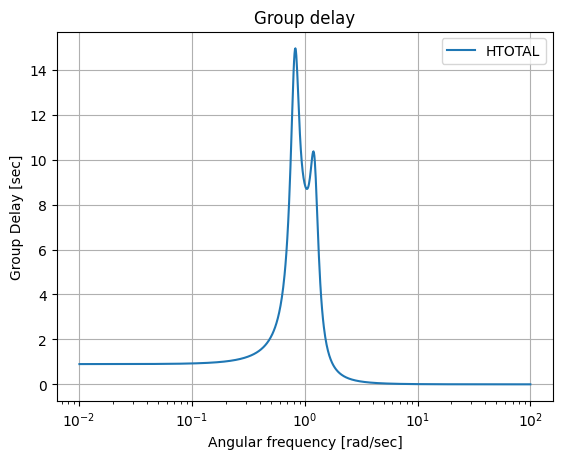

In [8]:
 
# raices del polinomio de orden 4
roots = np.roots([1, 1/Q,2 + 1/Q**2,1/Q,1])
print(f"ROOTS: {roots}")

# Cargamos la funcion transferencia como vectores de sus coeficientes.
num = np.array([ 1/Q,0])
den = np.array([ 1, 0.268, 1.474])
H1 = sig.TransferFunction( num, den )

num = np.array([ 1/Q, 0 ])
den = np.array([ 1, 0.1816, 0.675])
H2 = sig.TransferFunction( num, den )

num = np.array([ 1/Q, 0 ])
den = np.array([ 1, 1/Q, 1])
H3 = sig.TransferFunction( num, den )

HTOTAL = tfcascade(H1, tfcascade( H2 , H3))
#analyze_sys([H1, H2, H3, HTOTAL], sys_name=['H1', 'H2', 'H3', 'HTOTAL'])

analyze_sys(HTOTAL, sys_name='HTOTAL')


Haciendo un zoom en los puntos de interes podemos comprobar si el diseño fue exitoso:

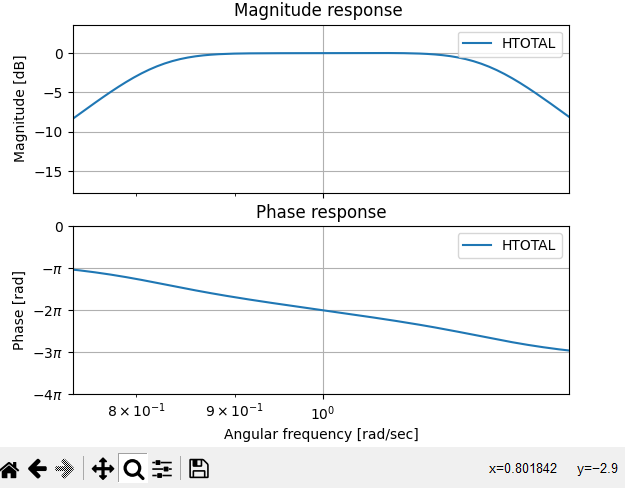
En esta imagen se observa que para una "W" normalizada = 0,8 tenemos una atenuacion de -3db, de igual forma sucede para una W = 1,25 pues son las frecuencias de las bandas de paso del filtro pasa bandas
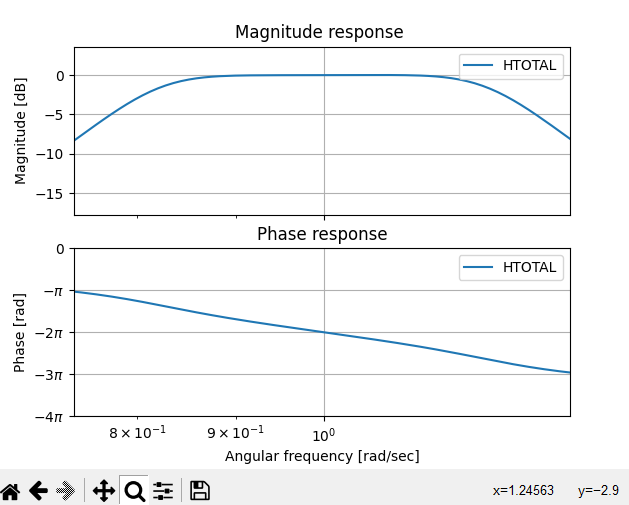

Si ahora analizamos a los extremos en la banda de paso debemos observar que haya almenos una atenuacion de 20db para una W normalizadas de 0,625 y 1,6
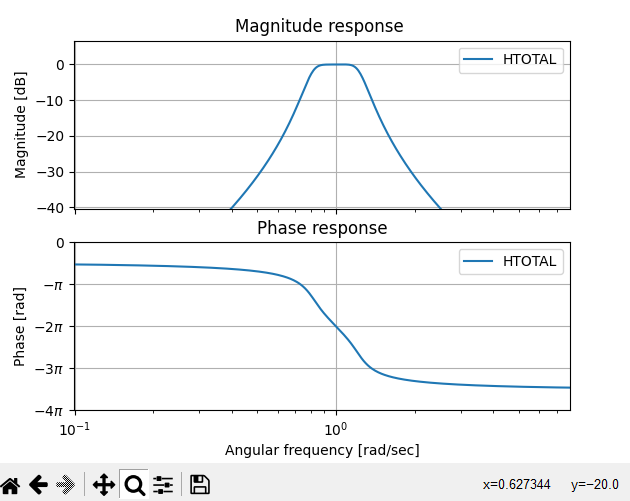
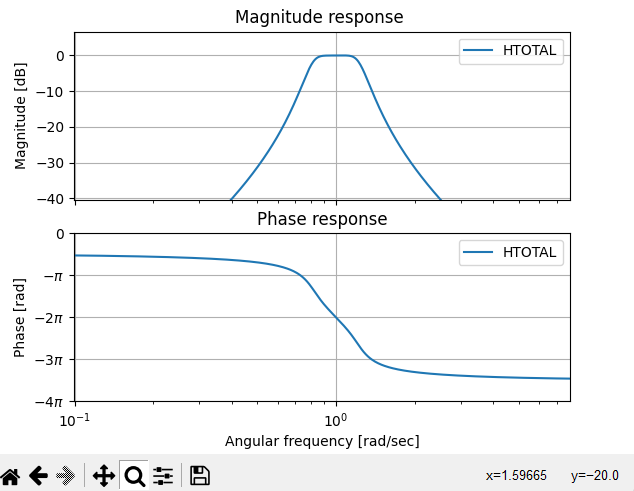

Como podemos observar la transformacion fue exitosa y se cumplio con todos los parametros pedidos en la plantilla de diseño.

<h2> Simulacion LT-SPICE</h2>

El circuito utilizado para llevar a cabo el filtro es un Ackerbg Mossberg de segundo orden pasa banda. Se colocaron 3 filtros en cascada haciendo que cada uno de ellos cumpla con una de las transferencias calculadas.

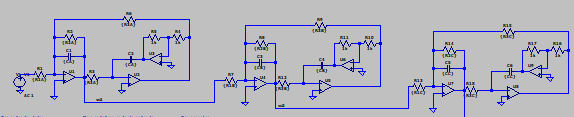

En este caso se simulo para los valores normalizados comprobando los valores de la plantilla pasa bandas.

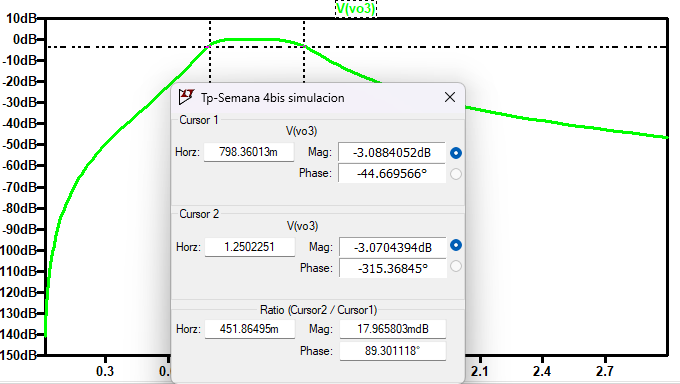
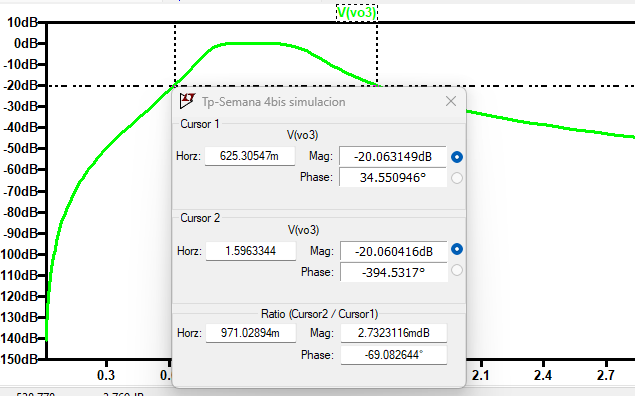

Como se puede observar el cirucito cumple con la plantilla pedida.

Aplicando ahora la desnormalizacion en frecuencia obtenemos los siguientes resultados
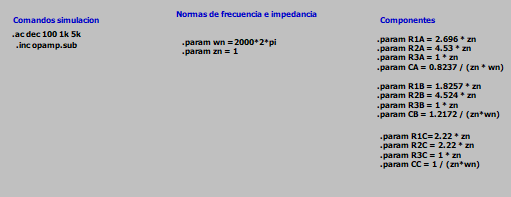

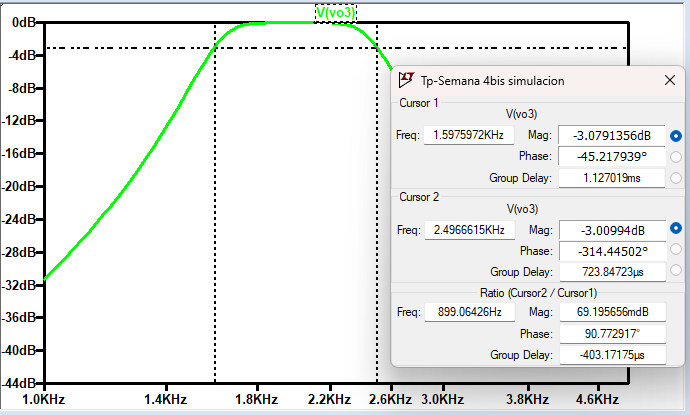

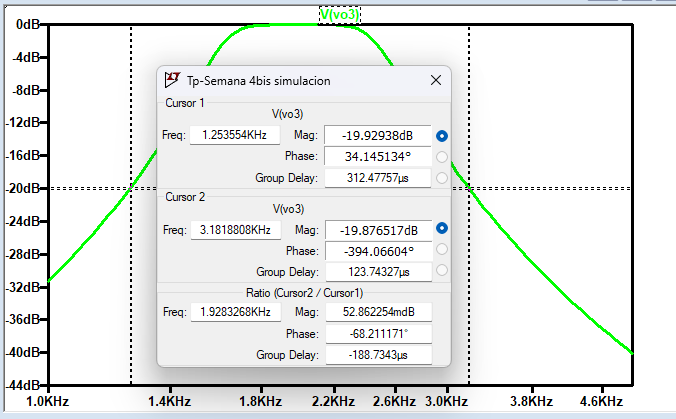

NOTA: normalice con una f=2k ya que con los 2M los op-amps dejaban de funcionar correctamente y la transferencia se veia afectada por su funcionamiento a alta frecuencia.

Si queremos tener una ganancia de 10dB en la banda de paso basta con cambiar la ganancia de uno de los op-Amps.
A continuacion se muestra con la ultima etapa con una ganancia de 10dB.

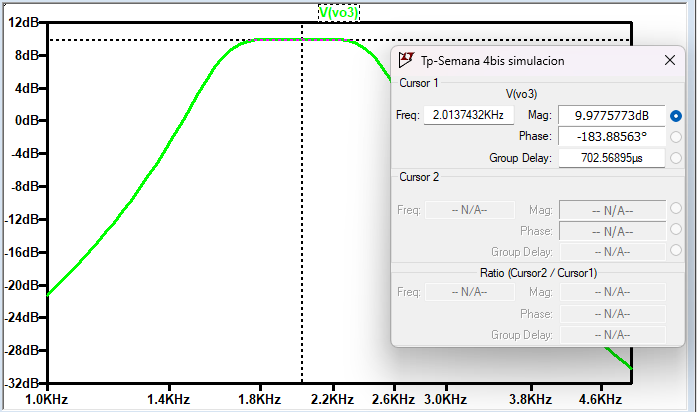

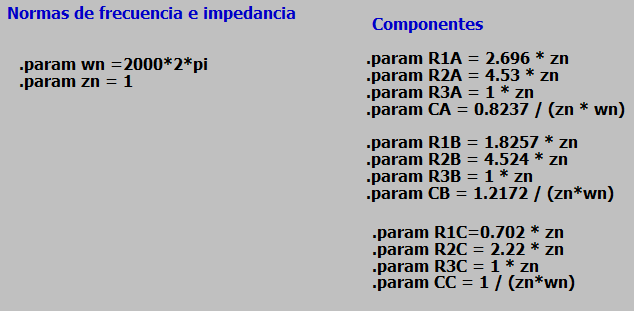